# Code for generating figures for NIMBUS manuscript

Date: 12/17/2024 \
Author: Jorge Gomez Tejeda Zanudo

This code regenerates Figures 2A and Supplemental Figures 2-5

YML files used to generate the Conda enviroment on which these figures were generated are included in the GitHub repository

## Import Libraries and Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from decimal import Decimal
import scipy.stats as stat
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from comut import comut

plt.rcParams["font.family"] = "arial"
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

## Read in files

In [2]:
#Sample IDs and timepoint information for Tissue F1CDX samples and ctDNA samples
ctDNA_dict=pd.read_csv("data/F1LCDX timepoint samples.csv",index_col=0)
tissue_dict=pd.read_csv("data/F1CDX samples.csv",index_col=0)
tissue_ctDNA_dict=pd.concat([tissue_dict,ctDNA_dict])

#Clinical metadata used in comut
clin_figures=pd.read_csv("data/clinical attributes comut.csv",index_col=0)

#Mutation information included in comut
snv_all_figures=pd.read_csv("data/mutations comut.csv",index_col=0)

#TMB data for trial eligibility, F1CDX, and F1LCDX samples
tmb_all_panels=pd.read_csv("data/TMB data all panels.csv",index_col=0)

#TMB data for F1CDX and F1LCDX samples
TMB_ctDNA_tissue=pd.read_csv("data/TMB_ctDNA_tissue.csv",index_col=0)

#Tumor fraction F1LCDX by timepoint baseline EOT
df_TF_plot=pd.read_csv("data/Tumor fraction ctDNA time.csv",index_col=0)

#Tumor fraction F1LCDX all timepoints
TF_all=pd.read_csv("data/Tumor fraction ctDNA time all.csv",index_col=0)

In [3]:
tissue_ctDNA_dict.head(5)

,Subject ID,Timepoint,SUBJECT_ID_TIMEPOINT
0,1,Tissue,P1_Tissue
73,10,Tissue,P10_Tissue
96,14,Tissue,P14_Tissue
122,21,Tissue,P21_Tissue
149,23,Tissue,P23_Tissue


In [4]:
clin_figures.head(5)

,casenum,age_geq50,age_order,Liver mets,HR_status,PDL1,chemo_lines,bestresp,ORR,clinical benefit
0,2,Y,20.0,0,HR +,positive,0 or 1,PD,NaN,NaN
1,9,N,4.0,0,TNBC,negative,0 or 1,PD,NaN,NaN
2,12,Y,29.0,1,HR +,negative,>1,PD,NaN,NaN
3,13,Y,20.0,1,HR +,negative,>1,PD,NaN,NaN
4,15,N,7.0,1,HR +,positive,0 or 1,PD,NaN,NaN


In [5]:
snv_all_figures.head(5)

,gene,Subject_ID,mutation_type,oncogenic,SUBJECT_ID_TIMEPOINT
0,RAD52,1,Missense,NaN,P1_Baseline
2,BRIP1,1,Missense,NaN,P1_Baseline
3,CDKN2A,1,Missense,NaN,P1_Baseline
4,ASXL1,1,Missense,NaN,P1_Baseline
5,BRCA2,1,Frameshift Deletion,Pathogenic / Likely Pathogenic,P1_Baseline


In [6]:
tmb_all_panels.head(5)

,Subject ID,bTMB_F1LCDX,TMB_F1CDX,TMB_Oncopanel,TMB_trialeligibility,TMB_trialeligibility_method
0,1,113.79,84.48,110.0,110.0,Oncopanel
1,2,11.38,NaN,9.9,9.9,Oncopanel
2,3,8.85,6.30,9.1,9.1,Oncopanel
3,4,32.87,8.83,9.9,9.9,Oncopanel
4,5,6.32,6.30,NaN,9.0,FoundationOne-Tissue


In [7]:
TMB_ctDNA_tissue.head(5)

,Subject ID,SUBJECT_ID_TIMEPOINT,TMB_muts
0,1,P1_Tissue,84.48
1,10,P10_Tissue,3.78
2,14,P14_Tissue,15.13
3,21,P21_Tissue,25.22
4,23,P23_Tissue,6.30


In [8]:
df_TF_plot.head(5)

,SUBJECT_ID,TIMEPOINT,SUBJECT_ID_TIMEPOINT,TF_ESTIMATE,TF_STATUS,clinical benefit,bestresp,Time,n
0,1.0,Baseline,P1_Baseline,0.220,estimated,Yes,PR,0,2
1,1.0,EOT,P1_EOT,0.000,not-detected,Yes,PR,1,2
2,2.0,Baseline,P2_Baseline,0.099,estimated,No,PD,0,2
3,2.0,EOT,P2_EOT,0.130,estimated,No,PD,1,2
7,6.0,Baseline,P6_Baseline,0.130,estimated,No,PD,0,2


# Defining sample subsets of interest

In [9]:
ctDNA_baseline=ctDNA_dict[ctDNA_dict["Timepoint"]=="Baseline"]["SUBJECT_ID_TIMEPOINT"].tolist()

tissue_baseline=tissue_dict["SUBJECT_ID_TIMEPOINT"].tolist()

tissue_but_not_baselinectDNA=[13,18,22,24,26,28,31]
tissue_ctDNA_baseline=ctDNA_baseline+tissue_dict[tissue_dict["Subject ID"].isin(tissue_but_not_baselinectDNA)]["SUBJECT_ID_TIMEPOINT"].tolist()

ctDNA_EOT=ctDNA_dict[ctDNA_dict["Timepoint"]=="EOT"]["SUBJECT_ID_TIMEPOINT"].tolist()

ctDNA_serial=ctDNA_dict[ctDNA_dict["Timepoint"].isin(['C1D15','C2D1'])]["SUBJECT_ID_TIMEPOINT"].tolist()

In [10]:
print(f'ctDNA baseline: {len(ctDNA_baseline)}')
print(f'Tissue: {len(tissue_baseline)}')
print(f'Tissue or ctDNA baseline: {len(tissue_ctDNA_baseline)}')
print(f'ctDNA EOT: {len(ctDNA_EOT)}')
print(f'ctDNA serial: {len(ctDNA_serial)}')

ctDNA baseline: 24
Tissue: 21
Tissue or ctDNA baseline: 29
ctDNA EOT: 8
ctDNA serial: 16


# CoMuts (Figure 2A, Supplemental Figures 2-5)

In [11]:
def prepare_files_comut(samples_id_timepoint,df_snv,df_clinical,df_tmb,df_dict,df_tf=[]):

    df_snv_curr=df_snv[df_snv["SUBJECT_ID_TIMEPOINT"].isin(samples_id_timepoint)]
    df_snv_curr=df_snv_curr.rename(columns={"Subject_ID":"sample","gene":"category","mutation_type":"value"})
    df_tmb_curr=df_tmb[df_tmb["SUBJECT_ID_TIMEPOINT"].isin(samples_id_timepoint)]
    df_dict_curr=df_dict[df_dict["SUBJECT_ID_TIMEPOINT"].isin(samples_id_timepoint)]
    pt_ids=df_dict_curr["Subject ID"].drop_duplicates().tolist()
    df_clinical_curr=df_clinical[df_clinical["casenum"].isin(pt_ids)]
    if(len(df_tf)>0): df_tf_curr=df_tf[df_tf["SUBJECT_ID_TIMEPOINT"].isin(samples_id_timepoint)]
    else: tf_curr=[]

    clin_curr=df_clinical_curr.copy(deep=True)

    hr = clin_curr[['casenum','HR_status']].rename(columns={'casenum':'sample','HR_status':'value'})
    hr['category'] = "HR Status"
    hr['value'] = hr['value'].replace({'TNBC':'negative','HR +':'positive'})

    pt_pdl1 = clin_curr[['casenum','PDL1']].rename(columns={'casenum':'sample','PDL1':'value'})
    pt_pdl1['category'] = "PD-L1 Status"
    pt_pdl1['value'][pt_pdl1['value'].isna()]="unknown"

    chemo_lines = clin_curr[['casenum','chemo_lines']].rename(columns={'casenum':'sample','chemo_lines':'value'})
    chemo_lines['category'] = "Prior Number of Chemotherapy Lines"

    liver = clin_curr[['casenum','Liver  mets']].rename(columns={'casenum':'sample','Liver  mets':'value'})
    liver['value'] = liver['value'].replace({0:'No',1:'Yes'})
    liver['category'] = "Liver Metastasis"

    Age = clin_curr[['casenum','age_geq50']].rename(columns={'casenum':'sample','age_geq50':'value'})
    Age['value'] = Age['value'].apply(lambda x: '\u2265 50' if x=="Y" else '< 50')
    Age['category'] = "Age"

    clin_response = clin_curr[['casenum','bestresp']].rename(columns={'casenum':'sample','bestresp':'value'})
    clin_response['category'] = "Best Clincial Response"

    response = clin_curr[['casenum','clinical benefit','bestresp']].rename(columns={'casenum':'sample','clinical benefit':'value'})
    response['value'] = response['value'].apply(lambda x: "Yes, CR+PR+SD >= 24 weeks" if x=="CBR (CR+PR+SD >= 24 weeks)" else 'No, CR+PR+SD < 24 weeks')
    response['value'] = response[['value','bestresp']].apply(lambda x: "No, not evaluable" if x[1]=="NE" else x[0],axis=1)
    response['category'] = "Clinical Benefit"

    sample_type=df_dict_curr[["Subject ID","SUBJECT_ID_TIMEPOINT"]].rename(columns={'Subject ID':'sample','SUBJECT_ID_TIMEPOINT':'value'})
    sample_type['value'] = sample_type["value"].str.contains("Tissue")
    sample_type['value'] = sample_type["value"].replace({True:'Tissue',False:'ctDNA'})
    sample_type['category'] = "Sample Type"

    df_sorting = df_clinical_curr[['casenum','ORR','HR_status','bestresp','age_order','Liver  mets']]
    df_sorting =   df_sorting.rename(columns={'casenum':'sample',
                                    'ORR':'Objective Response',
                                    'HR_status':'HR Status',
                                    'bestresp':'Clinical Response',
                                    'age_order':'Age',
                                    'Liver  mets':'Liver Metastasis'})
    df_sorting =  df_sorting.sort_values(by=['Objective Response','Clinical Response','Age','Liver Metastasis','HR Status'],ascending=False).fillna('')

    df_snv_curr_per = df_snv_curr[['sample','category']]
    n_cat=df_snv_curr_per["sample"].drop_duplicates().shape[0]
    df_snv_curr_per = pd.crosstab(index=df_snv_curr_per['category'], columns=df_snv_curr_per['sample'])
    df_snv_curr_per['value'] = np.count_nonzero(df_snv_curr_per.values, axis=1)
    df_snv_curr_per['value'] = round(df_snv_curr_per['value'] / n_cat * 100,2)
    df_snv_curr_per = df_snv_curr_per.sort_values(by='value',ascending=True).reset_index()
    df_snv_curr_per = df_snv_curr_per[['category','value']]

    df_curr_per_top25_gene = df_snv_curr_per.loc[df_snv_curr_per["value"]>=df_snv_curr_per.iloc[-25]["value"]]

    df_tmb_curr2 = df_tmb_curr.copy(deep=True)
    df_tmb_curr2["sample"]=df_tmb_curr2["Subject ID"]
    df_tmb_curr2["category"]="TMB Value"
    df_tmb_curr2['value'] = df_tmb_curr2['TMB_muts'].astype(float)
    df_tmb_curr2=df_tmb_curr2[["sample","category","value"]+df_tmb_curr.columns.tolist()]

    if(len(df_tf)>0):
        tf_curr=df_tf_curr.copy(deep=True)
        tf_curr["sample"]=tf_curr["SUBJECT_ID"].astype(int)
        tf_curr["category"]="Tumor Fraction"
        tf_curr['value'] = tf_curr['TF_ESTIMATE'].astype(float)
        tf_curr=tf_curr[["sample","value","category"]]

    mut_df=df_snv_curr
    dfcurr_sorting=df_sorting
    dfcurr_sample_type=sample_type
    snv_curr_response=response
    snv_curr_clin_response=clin_response
    age_curr=Age
    liver_curr=liver
    chemo_curr=chemo_lines
    pdl1_curr=pt_pdl1
    snv_curr_hr=hr
    snv_curr_tmb=df_tmb_curr2[["sample","value","category"]]
    dfcurr_top_25_gene=df_curr_per_top25_gene

    return mut_df,dfcurr_sorting,dfcurr_sample_type,snv_curr_response,snv_curr_clin_response,age_curr,liver_curr,snv_curr_hr,snv_curr_tmb,dfcurr_top_25_gene,tf_curr,chemo_curr,pdl1_curr


def comut_plot(mut_df,dfcurr_sorting,dfcurr_sample_type,snv_curr_response,snv_curr_clin_response,age_curr,liver_curr,snv_curr_hr,snv_curr_tmb,dfcurr_top_25_gene,mut_mapping,plot_name,chemo_curr,pdl1_curr,tf_curr=[],fig_width=18,fig_height=15,label_pad=15,y_padding=0.04,x_padding=0.05,wspace=0.3,perc_loc="center"):
    dfcurr_comut=mut_df.copy(deep=True)[["sample","category","value","oncogenic"]]
    df_hist=pd.DataFrame(dfcurr_comut[["sample","category"]].value_counts()).reset_index().rename(columns={0:"N"})
    dfcurr_comut=pd.merge(dfcurr_comut,df_hist,on=["sample","category"])

    dfcurr_comut_patho=dfcurr_comut[dfcurr_comut["oncogenic"]=="Pathogenic / Likely Pathogenic"]
    dfcurr_comut_patho["value"]="Pathogenic / Likely Pathogenic"
    dfcurr_comut_patho=dfcurr_comut_patho.drop_duplicates()

    dfcurr_comut_dup=dfcurr_comut.copy(deep=True)
    dfcurr_comut_dup["oncogenic"]=""
    dfcurr_comut_dup["value"]=np.where(dfcurr_comut_dup["N"]==1,dfcurr_comut_dup["value"],"Multiple")
    dfcurr_comut_dup=dfcurr_comut_dup.drop_duplicates()

    dfcurr_comut=pd.concat([dfcurr_comut_dup,dfcurr_comut_patho])

    curr_comut = comut.CoMut()
    curr_comut.samples = dfcurr_sorting['sample']

    curr_mut_mapping = mut_mapping
    curr_comut.add_categorical_data(dfcurr_comut,name='Mutation Type',mapping=curr_mut_mapping,category_order=dfcurr_top_25_gene['category'],
                                value_order = ['Pathogenic / Likely Pathogenic'], priority=['Pathogenic / Likely Pathogenic'],borders=["Pathogenic / Likely Pathogenic"])

    curr_comut.add_categorical_data(dfcurr_sample_type,name='Sample Type',mapping={'Tissue':'grey','ctDNA':'black'})


    objective_mapping = {'No, not evaluable':"lightblue",'No, CR+PR+SD < 24 weeks':'blue','Yes, CR+PR+SD >= 24 weeks':'red'}
    curr_comut.add_categorical_data(snv_curr_response,name='Clinical Benefit',mapping=objective_mapping)

    clin_response_mapping = {'PR':'deepskyblue','PD':'lawngreen','SD':'darkorange','NE':'deeppink'}
    curr_comut.add_categorical_data(snv_curr_clin_response,name='Best Clinical Response',mapping=clin_response_mapping)

    age_mapping = {'\u2265 50':'darkgreen','< 50':'pink'}
    curr_comut.add_categorical_data(age_curr,name='Age',mapping=age_mapping)

    liver_mapping = {'No':'violet','Yes':'salmon'}
    curr_comut.add_categorical_data(liver_curr,name='Liver Metastasis',mapping=liver_mapping)

    chemo_mapping = {'0 or 1':'#bdd7e7','>1':'#08519c'}
    curr_comut.add_categorical_data(chemo_curr,name='Prior Chemotherapy Lines',mapping= chemo_mapping)

    pdl1_mapping = {'negative':'grey','positive':'#a6611a','unknown': "lightgray"}
    curr_comut.add_categorical_data(pdl1_curr,name='PD-L1 Status',mapping=pdl1_mapping)

    hr_mapping = {'negative':'grey','positive':'gold'}
    curr_comut.add_categorical_data(snv_curr_hr,name='HR Status',mapping=hr_mapping)

    heights = {}
    if(len(tf_curr)>0):
        snv_bar_kwargs = {'width': 0.85,'facecolor':'grey'}
        curr_comut.add_bar_data(tf_curr, name = 'Tumor Fraction',bar_kwargs = snv_bar_kwargs, 
                        ylabel = 'Tumor\nFraction')
        heights = {'Tumor Fraction': 1.5}

    snv_bar_kwargs = {'width': 0.85,'facecolor':'grey'}
    curr_comut.add_bar_data(snv_curr_tmb, name = 'Mutation Burden',bar_kwargs = snv_bar_kwargs, 
                        ylabel = 'TMB\nMuts/Mb')

    curr_sidebar_kwargs = {'height': 0.8, 'facecolor':'lightgrey'}
    curr_comut.add_side_bar_data(dfcurr_top_25_gene, paired_name = 'Mutation Type', name='Mutation Percentage',
                                        xlabel = '% of samples', position = 'left',
                                        bar_kwargs = curr_sidebar_kwargs)

    # calculate the percentage of samples with that gene mutated, rounding and adding a percent sign
    curr_percentages = dfcurr_top_25_gene['value'].astype(str) + '%'
    curr_percentages = curr_percentages.iloc[::-1]

    curr_comut.plot_comut(x_padding = x_padding, y_padding = y_padding, tri_padding = 0.03, heights=heights , hspace = 0.1, wspace = wspace,
                        figsize = (fig_width,fig_height))
    curr_comut.add_unified_legend(fontsize=14)

    # set location of yticks
    curr_comut.axes['Mutation Percentage'].set_yticks([0.5+i for i in range(0,len(dfcurr_top_25_gene))])

    # set labels of yticks
    curr_comut.axes['Mutation Percentage'].set_yticklabels(list(curr_percentages[::-1]),fontsize=14)

    # move the ytick labels inside the bar graph
    curr_comut.axes['Mutation Percentage'].tick_params(axis='y', pad=label_pad)

    # Make y axis visible (by default it is not visible)
    curr_comut.axes['Mutation Percentage'].get_yaxis().set_visible(True)

    # move y axis ticks to the right
    curr_comut.axes['Mutation Percentage'].yaxis.tick_right()

    curr_comut.axes['Sample Type'].tick_params(axis='y',which='major', labelsize=14)
    curr_comut.axes['Clinical Benefit'].tick_params(axis='y',which='major', labelsize=14)
    curr_comut.axes['Best Clinical Response'].tick_params(axis='y',which='major', labelsize=14)
    curr_comut.axes['Age'].tick_params(axis='y',which='major', labelsize=14)
    curr_comut.axes['Liver Metastasis'].tick_params(axis='y',which='major', labelsize=14)
    curr_comut.axes['HR Status'].tick_params(axis='y',which='major', labelsize=14)
    curr_comut.axes['Prior Chemotherapy Lines'].tick_params(axis='y',which='major', labelsize=14)
    curr_comut.axes['PD-L1 Status'].tick_params(axis='y',which='major', labelsize=14)
    curr_comut.axes['Mutation Type'].tick_params(axis='y',which='major', labelsize=14)
    curr_comut.axes['Mutation Type'].tick_params(axis='x',which='major', labelsize=14)
    if(len(tf_curr)>0):
        curr_comut.axes['Tumor Fraction'].tick_params(axis='y',which='major',labelsize=10)
        curr_comut.axes['Tumor Fraction'].set_yticks([0,0.5,1])
    curr_comut.axes['Mutation Burden'].tick_params(axis='y',which='major', labelsize=10)
    curr_comut.axes['Mutation Percentage'].tick_params(axis='x',which='major', labelsize=14)
    curr_comut.axes['Mutation Percentage'].set_xlabel('% of samples',fontsize=14,loc=perc_loc)

    curr_comut.figure.savefig(f'./NIMBUS Figures/{plot_name}.pdf', bbox_inches = 'tight', dpi = 300)
    curr_comut.figure.savefig(f'./NIMBUS Figures/{plot_name}.png', bbox_inches = 'tight', dpi = 300)


<ipython-input-11-e87c1084b135>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pt_pdl1['value'][pt_pdl1['value'].isna()]="unknown"
<ipython-input-11-e87c1084b135>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcurr_comut_patho["value"]="Pathogenic / Likely Pathogenic"


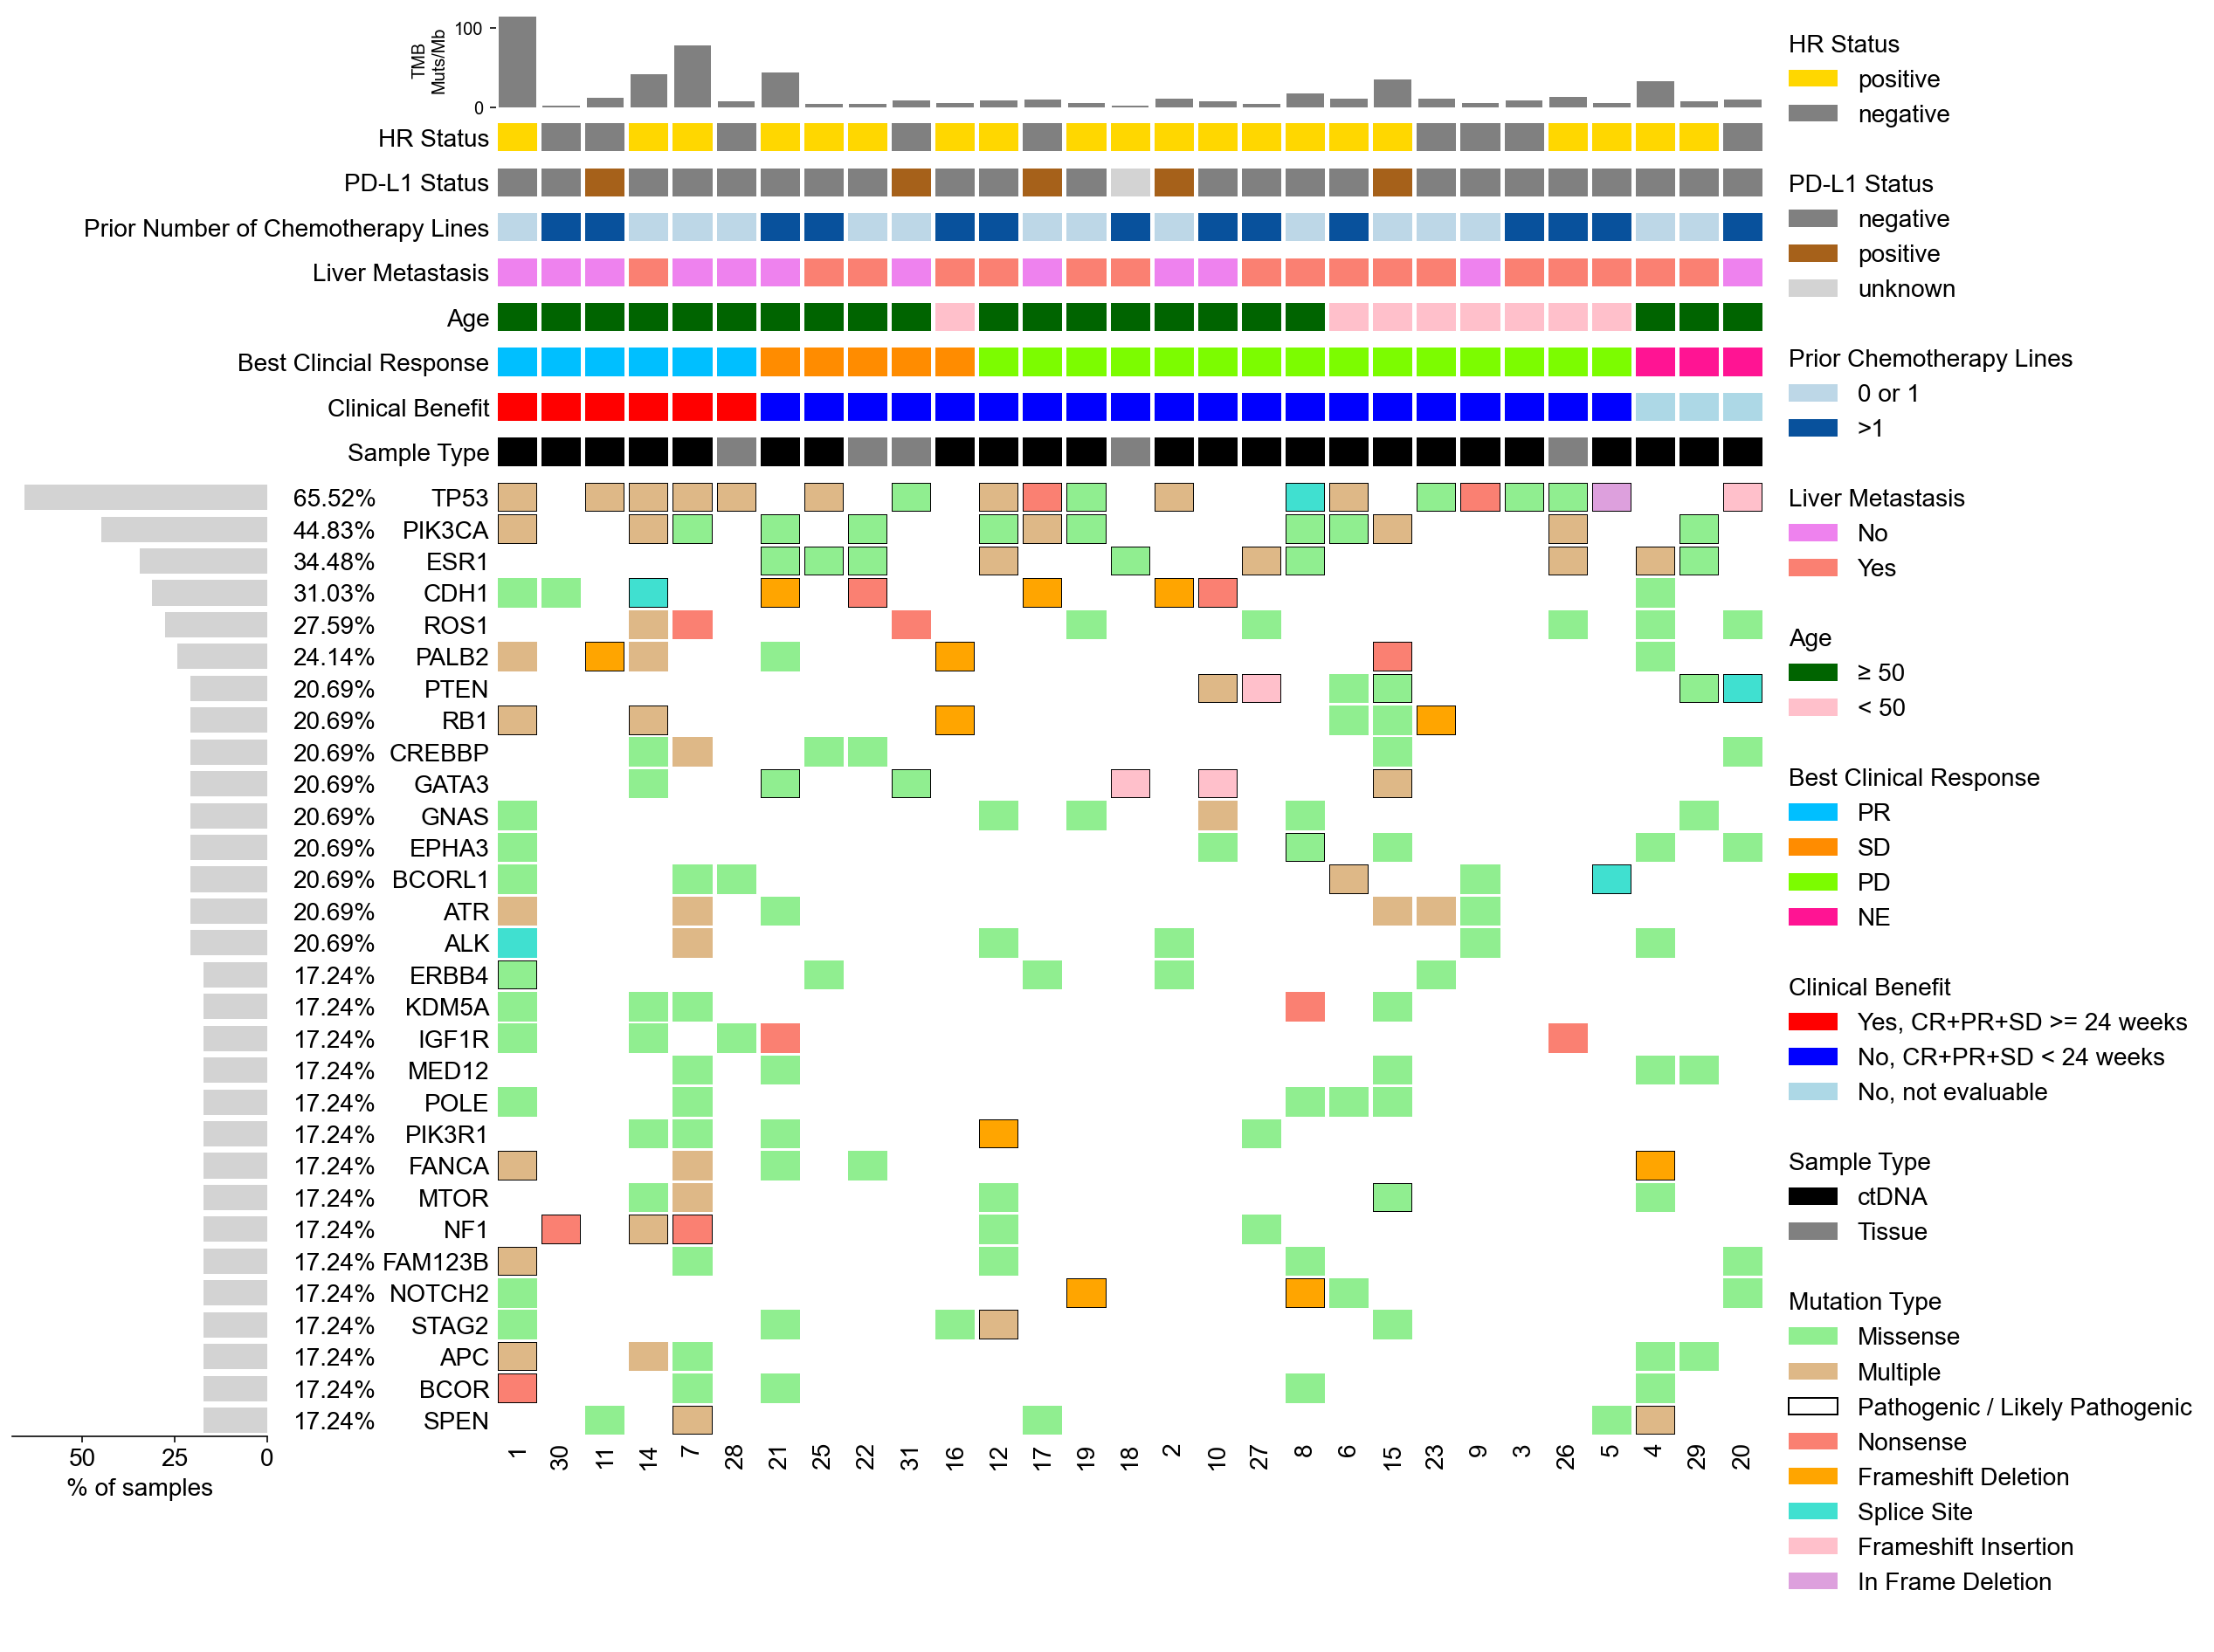

In [12]:
samples_id_timepoint=tissue_ctDNA_baseline
df_snv=snv_all_figures
df_clinical=clin_figures
df_tmb=TMB_ctDNA_tissue
df_dict=tissue_ctDNA_dict

mut_df,dfcurr_sorting,dfcurr_sample_type,snv_curr_response,snv_curr_clin_response,age_curr,liver_curr,snv_curr_hr,snv_curr_tmb,dfcurr_top_25_gene,tf_curr,chemo_curr,pdl1_curr = prepare_files_comut(samples_id_timepoint,df_snv,df_clinical,df_tmb,df_dict)

mut_mapping={'Missense': 'lightgreen', 'Frameshift Deletion': 'orange','Frameshift Insertion':'pink',
                      'In Frame Deletion': 'plum','In Frame Insertion': 'lightsteelblue','Nonsense':'salmon',
                      'Splice Site':'turquoise','Multiple':'burlywood','Pathogenic / Likely Pathogenic': {'facecolor':'none', 'edgecolor':'black'}}
plot_name="Figure 2A - ctDNA and tissue baseline"

comut_plot(mut_df,dfcurr_sorting,dfcurr_sample_type,snv_curr_response,snv_curr_clin_response,age_curr,liver_curr,snv_curr_hr,snv_curr_tmb,dfcurr_top_25_gene,mut_mapping,plot_name,chemo_curr,pdl1_curr,tf_curr)

<ipython-input-11-e87c1084b135>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pt_pdl1['value'][pt_pdl1['value'].isna()]="unknown"
<ipython-input-11-e87c1084b135>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcurr_comut_patho["value"]="Pathogenic / Likely Pathogenic"


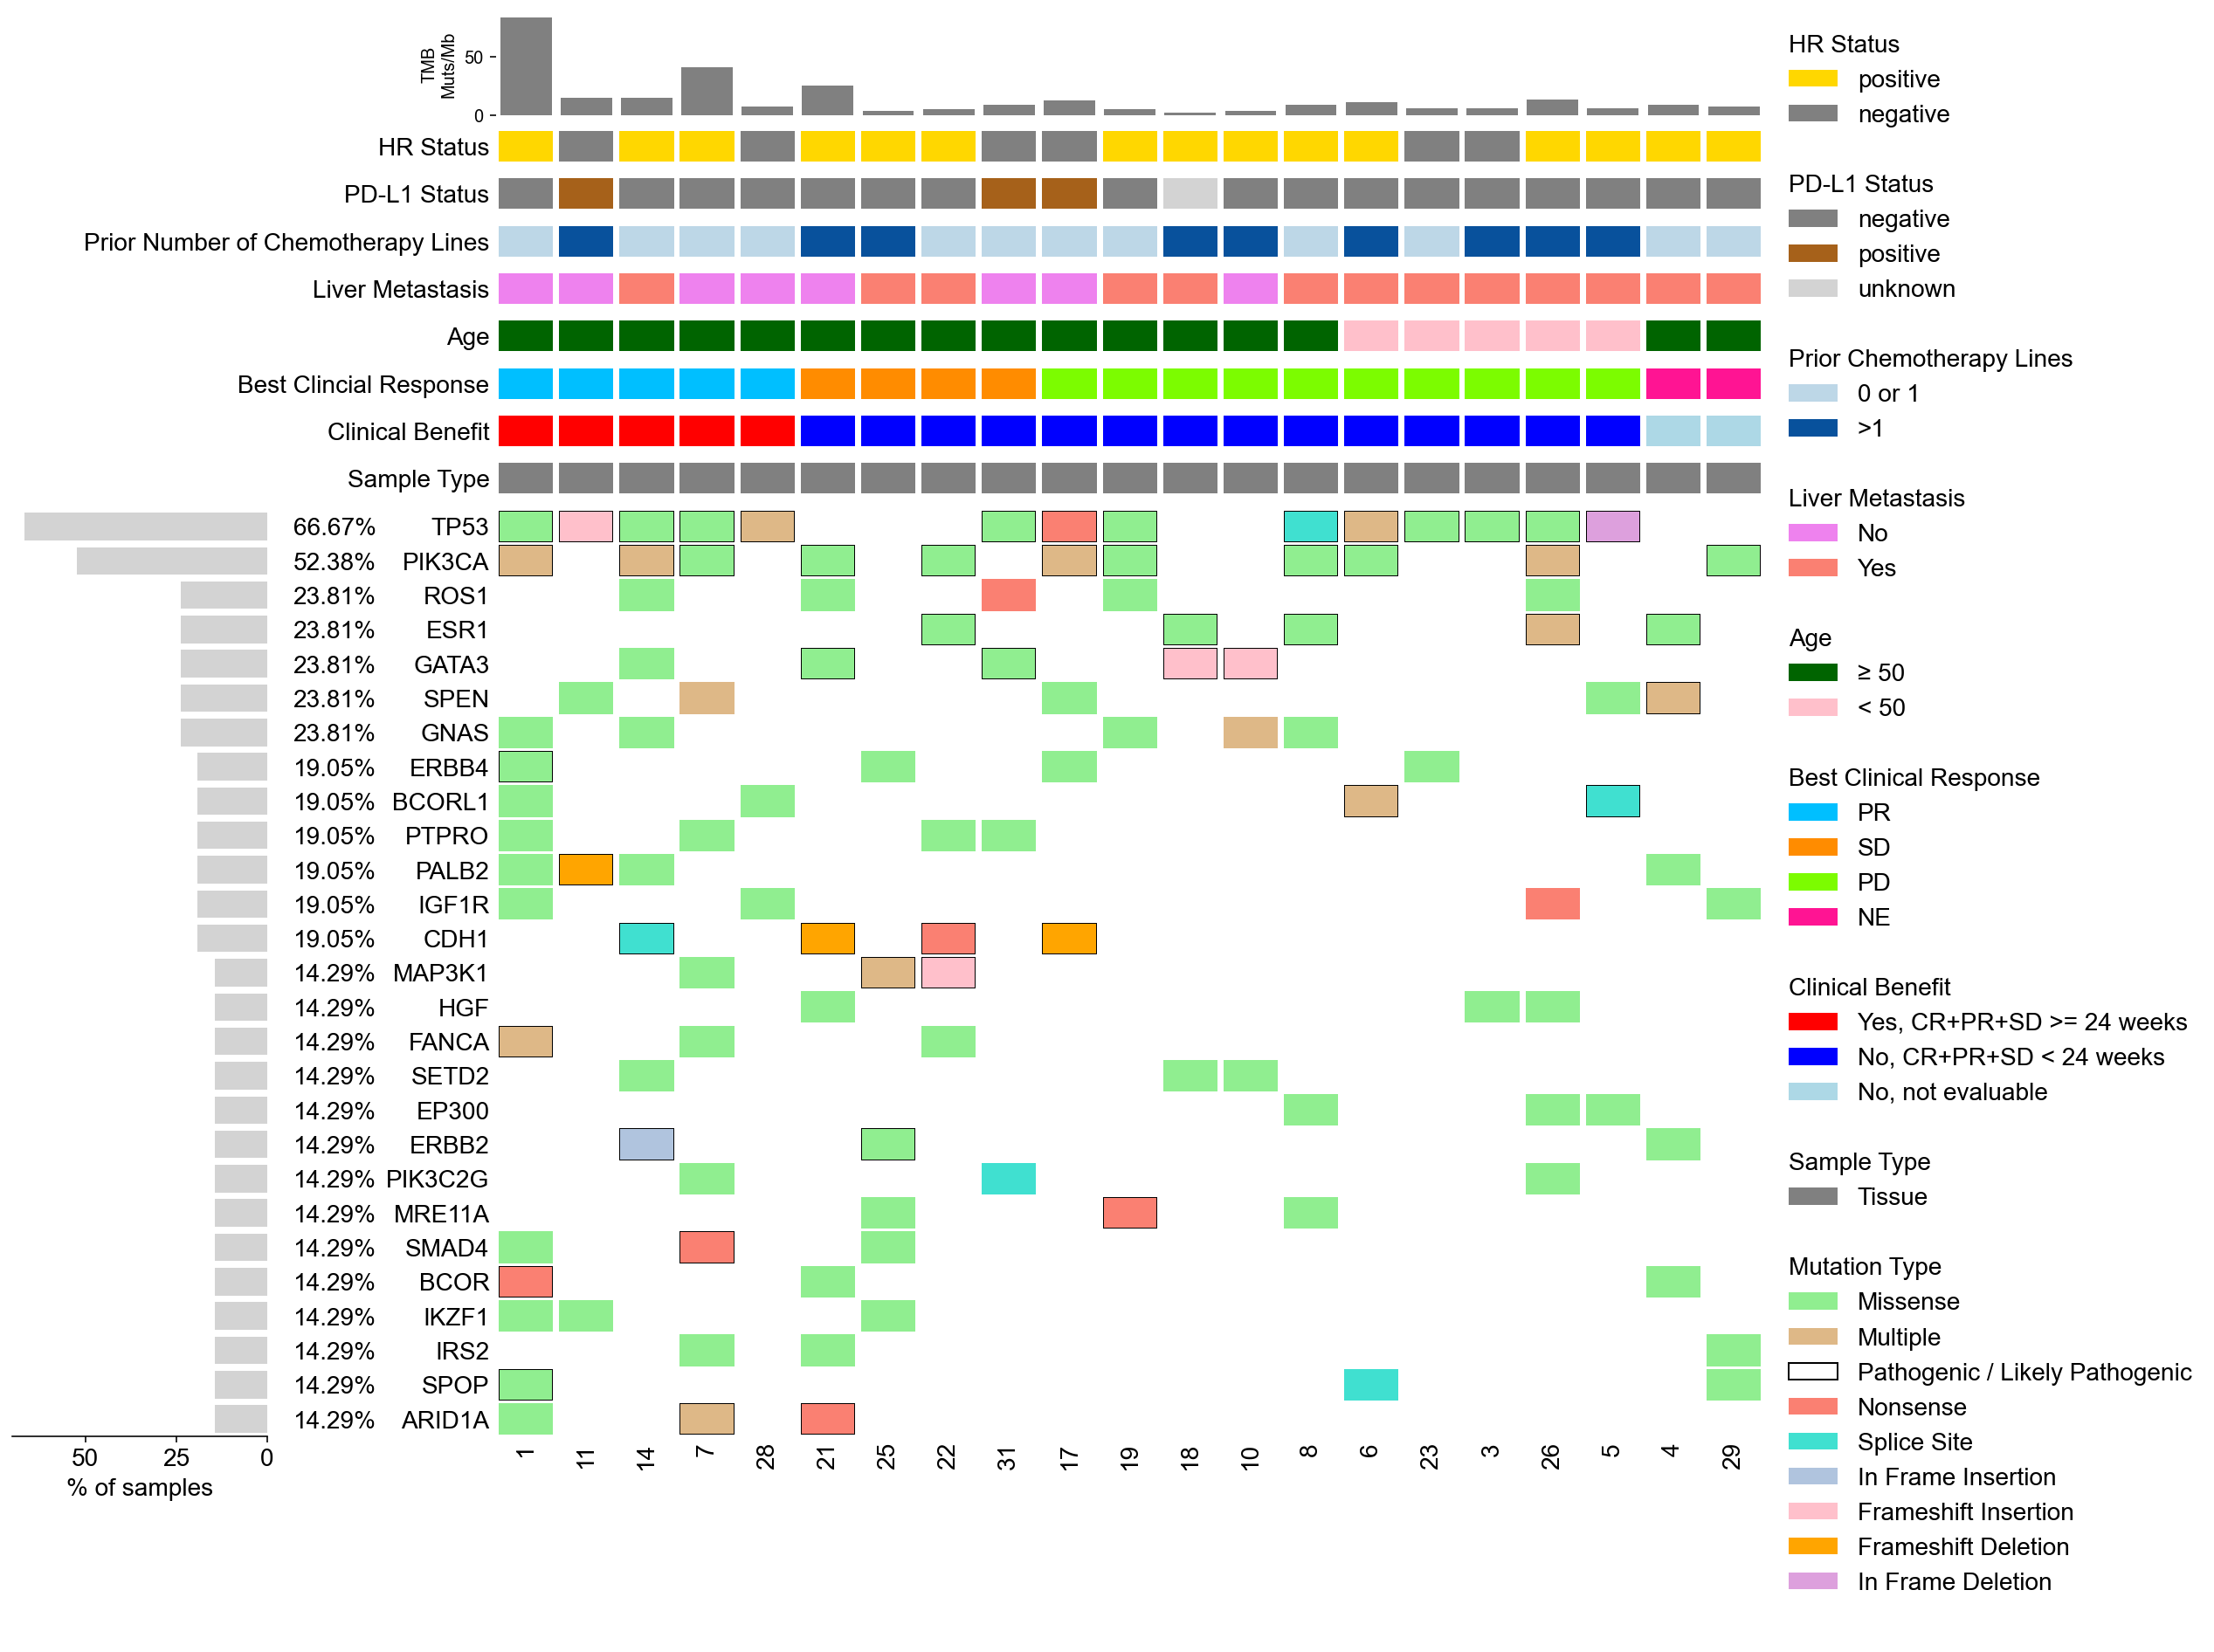

In [13]:
samples_id_timepoint=tissue_baseline
df_snv=snv_all_figures
df_clinical=clin_figures
df_tmb=TMB_ctDNA_tissue
df_dict=tissue_ctDNA_dict

mut_df,dfcurr_sorting,dfcurr_sample_type,snv_curr_response,snv_curr_clin_response,age_curr,liver_curr,snv_curr_hr,snv_curr_tmb,dfcurr_top_25_gene,tf_curr,chemo_curr,pdl1_curr = prepare_files_comut(samples_id_timepoint,df_snv,df_clinical,df_tmb,df_dict)

mut_mapping={'Missense': 'lightgreen', 'Frameshift Deletion': 'orange','Frameshift Insertion':'pink',
                        'In Frame Deletion': 'plum','In Frame Insertion': 'lightsteelblue','Nonsense':'salmon',
                        'Splice Site':'turquoise','Multiple':'burlywood','Pathogenic / Likely Pathogenic': {'facecolor':'none', 'edgecolor':'black'}}
plot_name="Supplemental Figure 2 - tissue baseline"

comut_plot(mut_df,dfcurr_sorting,dfcurr_sample_type,snv_curr_response,snv_curr_clin_response,age_curr,liver_curr,snv_curr_hr,snv_curr_tmb,dfcurr_top_25_gene,mut_mapping,plot_name,chemo_curr,pdl1_curr,tf_curr)

<ipython-input-11-e87c1084b135>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pt_pdl1['value'][pt_pdl1['value'].isna()]="unknown"
<ipython-input-11-e87c1084b135>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcurr_comut_patho["value"]="Pathogenic / Likely Pathogenic"


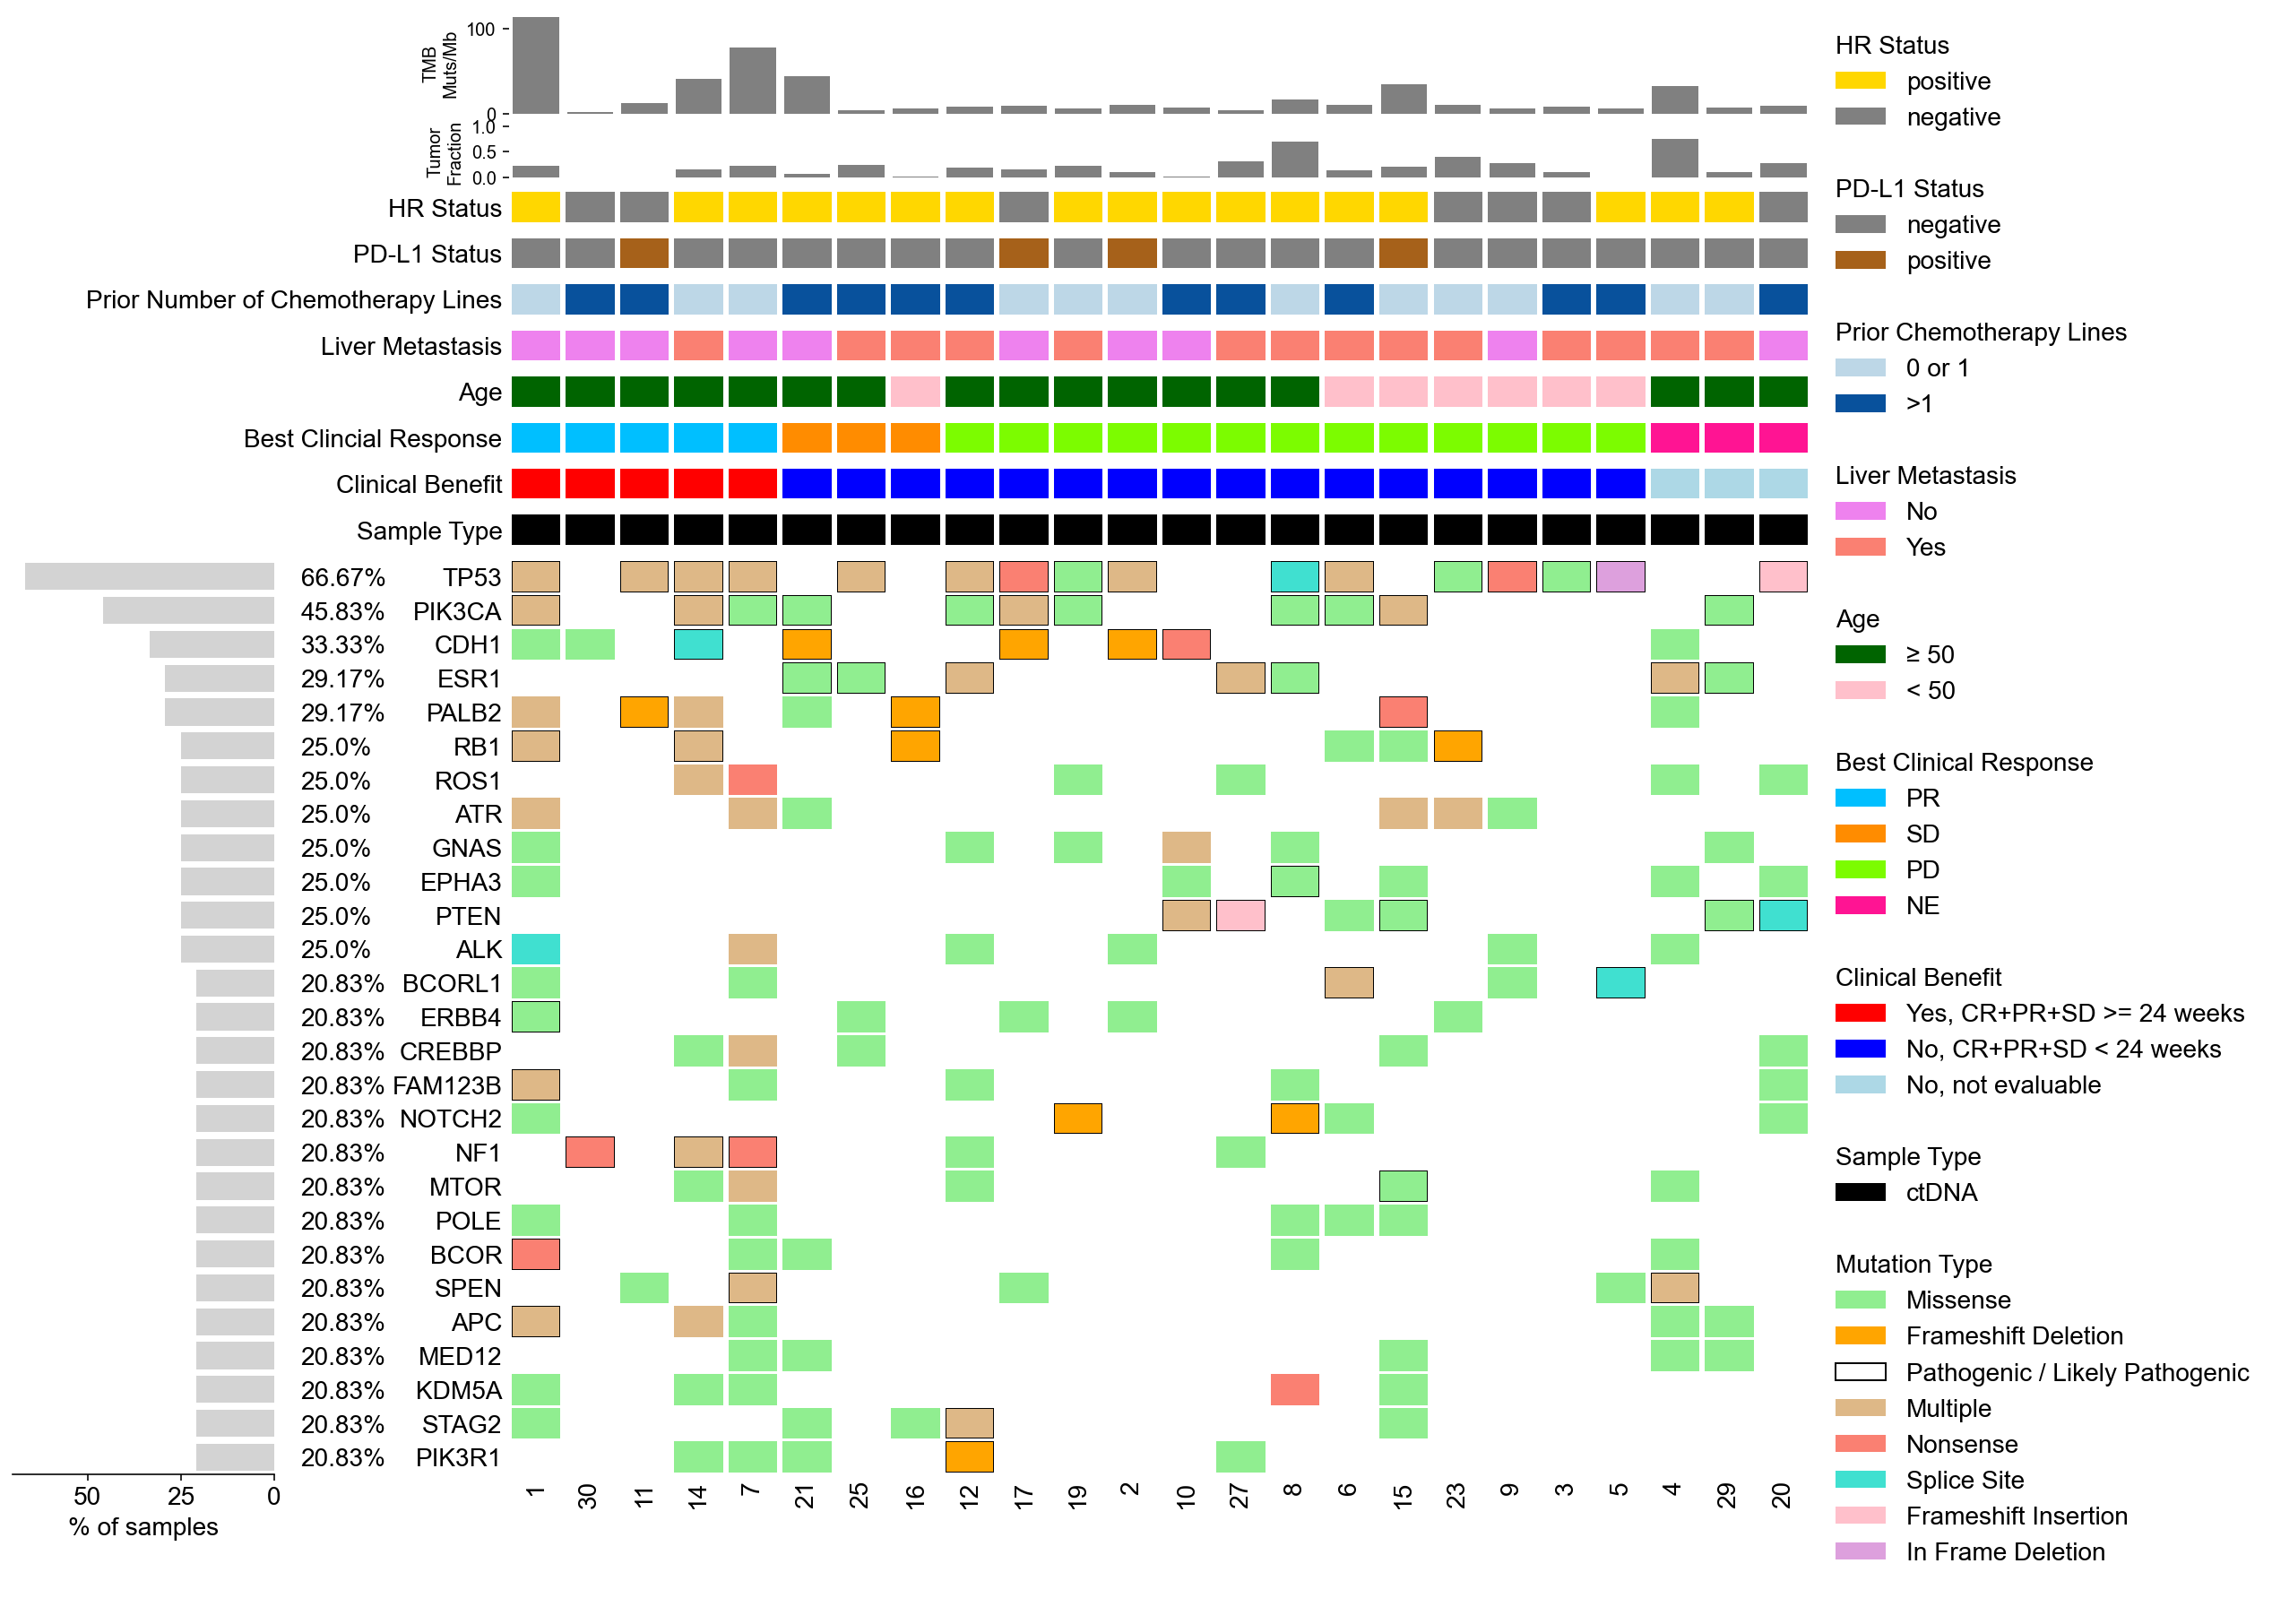

In [14]:
samples_id_timepoint=ctDNA_baseline
df_snv=snv_all_figures
df_clinical=clin_figures
df_tmb=TMB_ctDNA_tissue
df_tf=TF_all
df_dict=tissue_ctDNA_dict

mut_df,dfcurr_sorting,dfcurr_sample_type,snv_curr_response,snv_curr_clin_response,age_curr,liver_curr,snv_curr_hr,snv_curr_tmb,dfcurr_top_25_gene, tf_curr,chemo_curr,pdl1_curr = prepare_files_comut(samples_id_timepoint,df_snv,df_clinical,df_tmb,df_dict,df_tf)

plot_name="Supplemental Figure 3 - ctDNA baseline"
mut_mapping={'Missense': 'lightgreen', 'Frameshift Deletion': 'orange','Frameshift Insertion':'pink',
                      'In Frame Deletion': 'plum','In Frame Insertion': 'lightsteelblue','Nonsense':'salmon',
                      'Splice Site':'turquoise','Multiple':'burlywood','Pathogenic / Likely Pathogenic': {'facecolor':'none', 'edgecolor':'black'}}

comut_plot(mut_df,dfcurr_sorting,dfcurr_sample_type,snv_curr_response,snv_curr_clin_response,age_curr,liver_curr,snv_curr_hr,snv_curr_tmb,dfcurr_top_25_gene,mut_mapping,plot_name,chemo_curr,pdl1_curr,tf_curr)

<ipython-input-11-e87c1084b135>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pt_pdl1['value'][pt_pdl1['value'].isna()]="unknown"
<ipython-input-11-e87c1084b135>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcurr_comut_patho["value"]="Pathogenic / Likely Pathogenic"


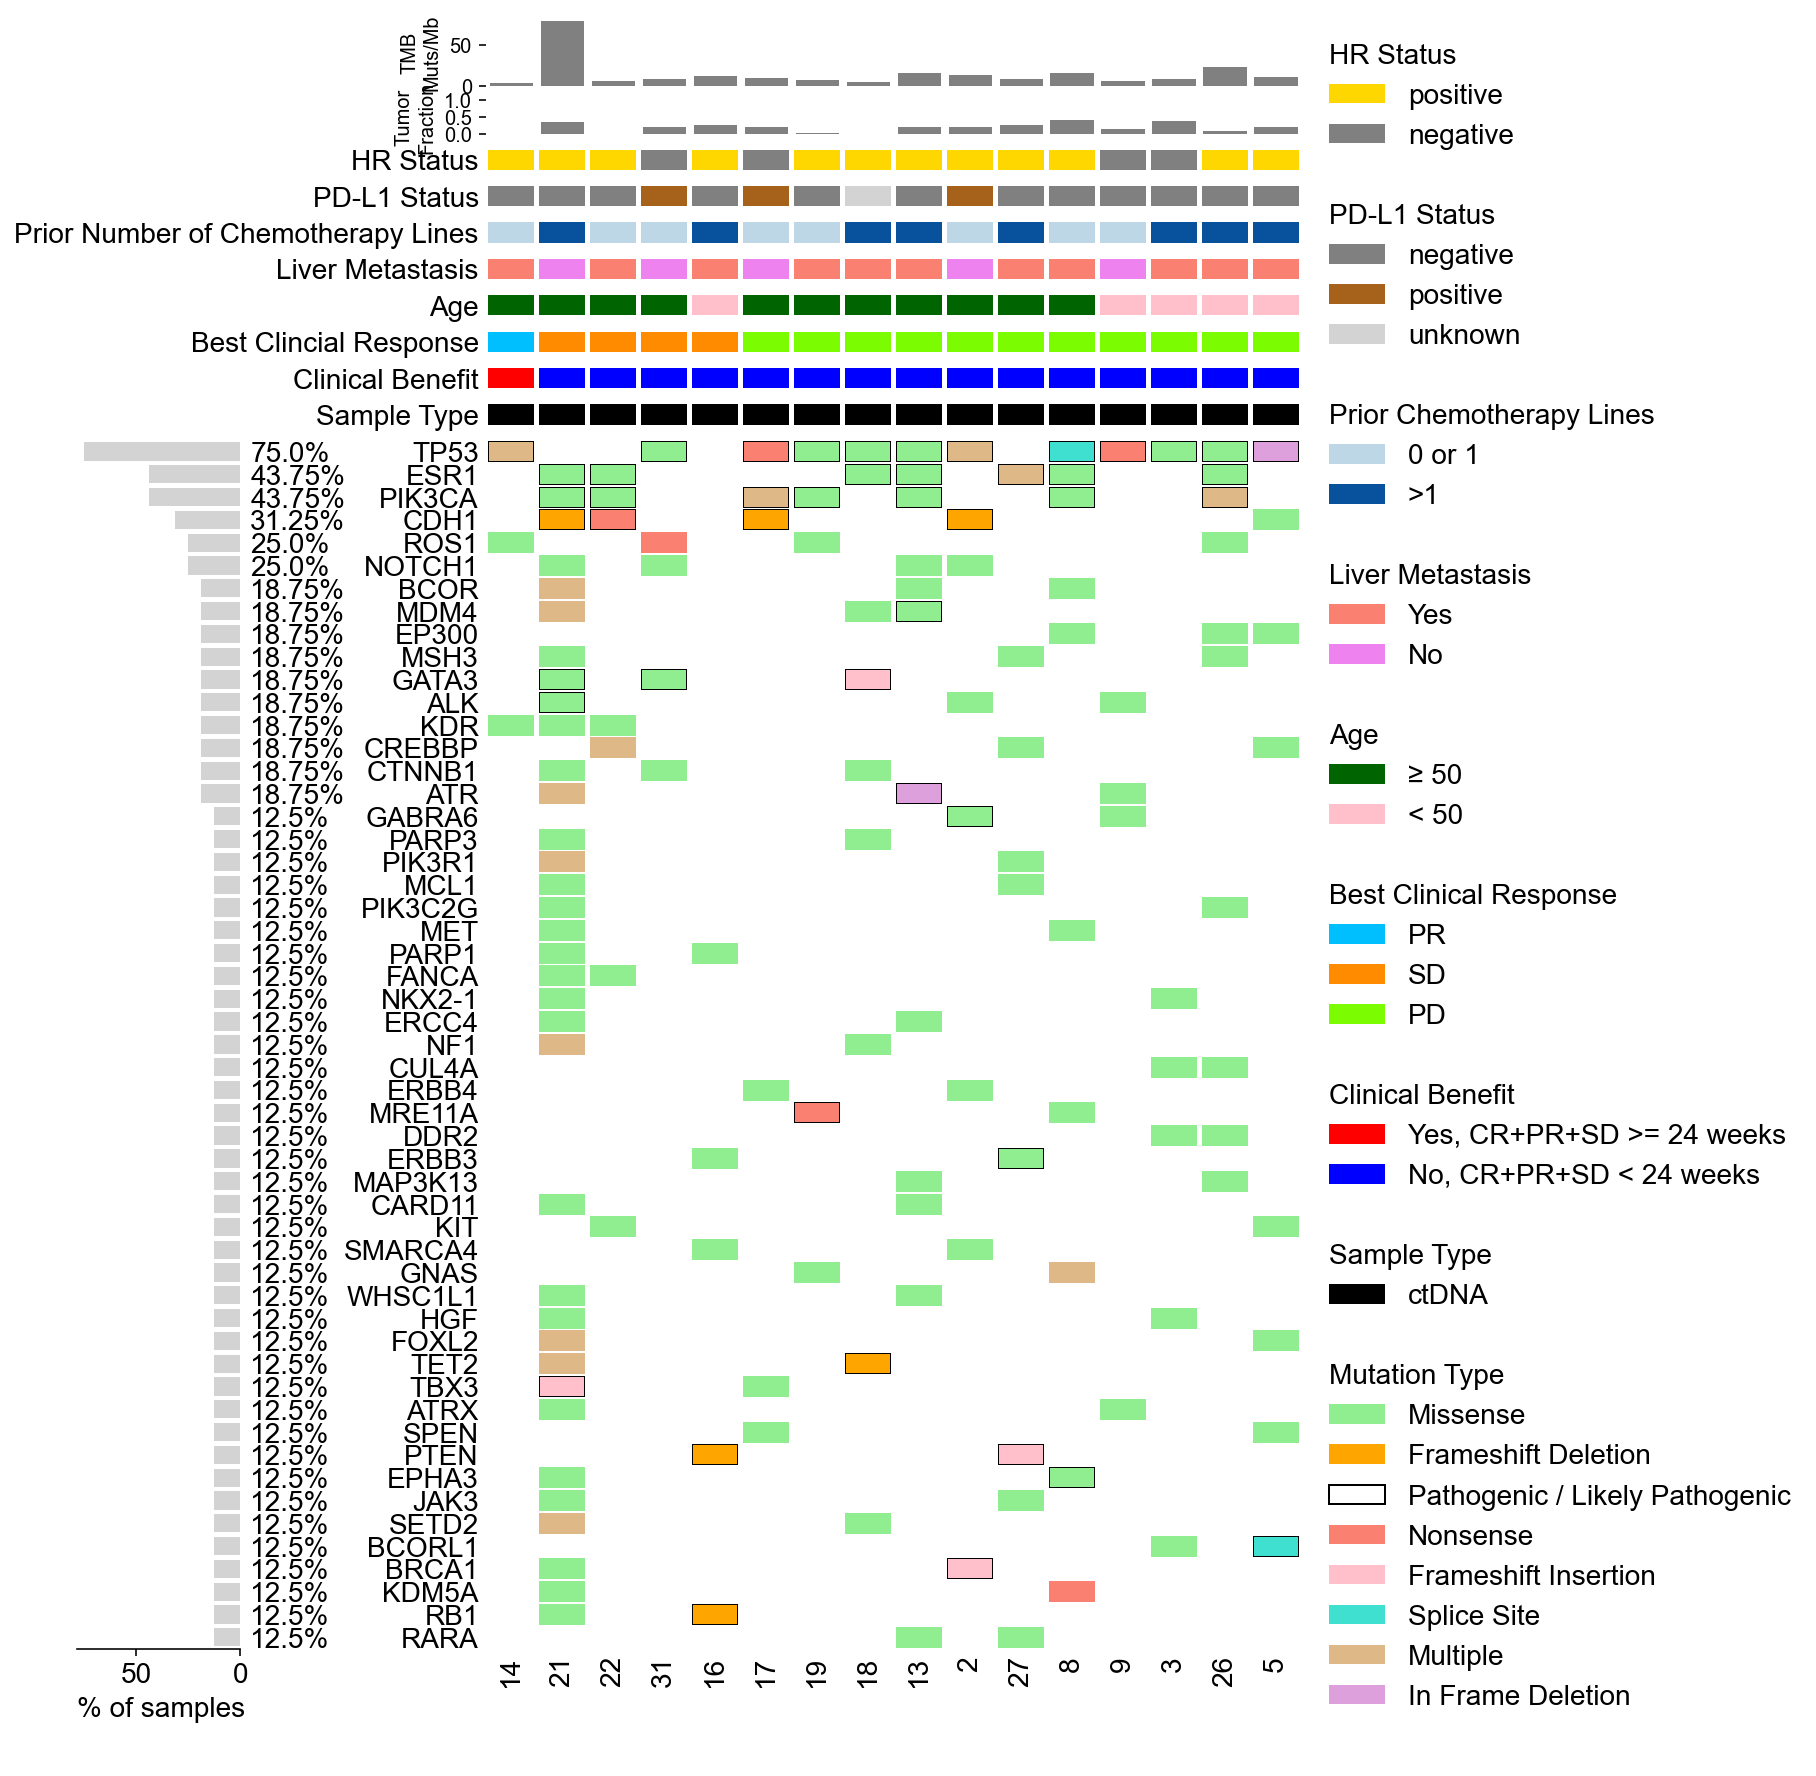

In [15]:
samples_id_timepoint=ctDNA_serial
df_snv=snv_all_figures
df_clinical=clin_figures
df_tmb=TMB_ctDNA_tissue
df_tf=TF_all
df_dict=tissue_ctDNA_dict
label_pad=5
fig_width=11
wspace=0.5
perc_loc="left"

mut_df,dfcurr_sorting,dfcurr_sample_type,snv_curr_response,snv_curr_clin_response,age_curr,liver_curr,snv_curr_hr,snv_curr_tmb,dfcurr_top_25_gene, tf_curr,chemo_curr,pdl1_curr = prepare_files_comut(samples_id_timepoint,df_snv,df_clinical,df_tmb,df_dict,df_tf)

plot_name="Supplemental Figure 4 - ctDNA serial"
mut_mapping={'Missense': 'lightgreen', 'Frameshift Deletion': 'orange','Frameshift Insertion':'pink',
                      'In Frame Deletion': 'plum','In Frame Insertion': 'lightsteelblue','Nonsense':'salmon',
                      'Splice Site':'turquoise','Multiple':'burlywood','Pathogenic / Likely Pathogenic': {'facecolor':'none', 'edgecolor':'black'}}

comut_plot(mut_df,dfcurr_sorting,dfcurr_sample_type,snv_curr_response,snv_curr_clin_response,age_curr,liver_curr,snv_curr_hr,snv_curr_tmb,dfcurr_top_25_gene,mut_mapping,plot_name,chemo_curr,pdl1_curr,tf_curr,fig_width=fig_width,label_pad=label_pad,wspace=wspace,perc_loc=perc_loc)

<ipython-input-11-e87c1084b135>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pt_pdl1['value'][pt_pdl1['value'].isna()]="unknown"
<ipython-input-11-e87c1084b135>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcurr_comut_patho["value"]="Pathogenic / Likely Pathogenic"


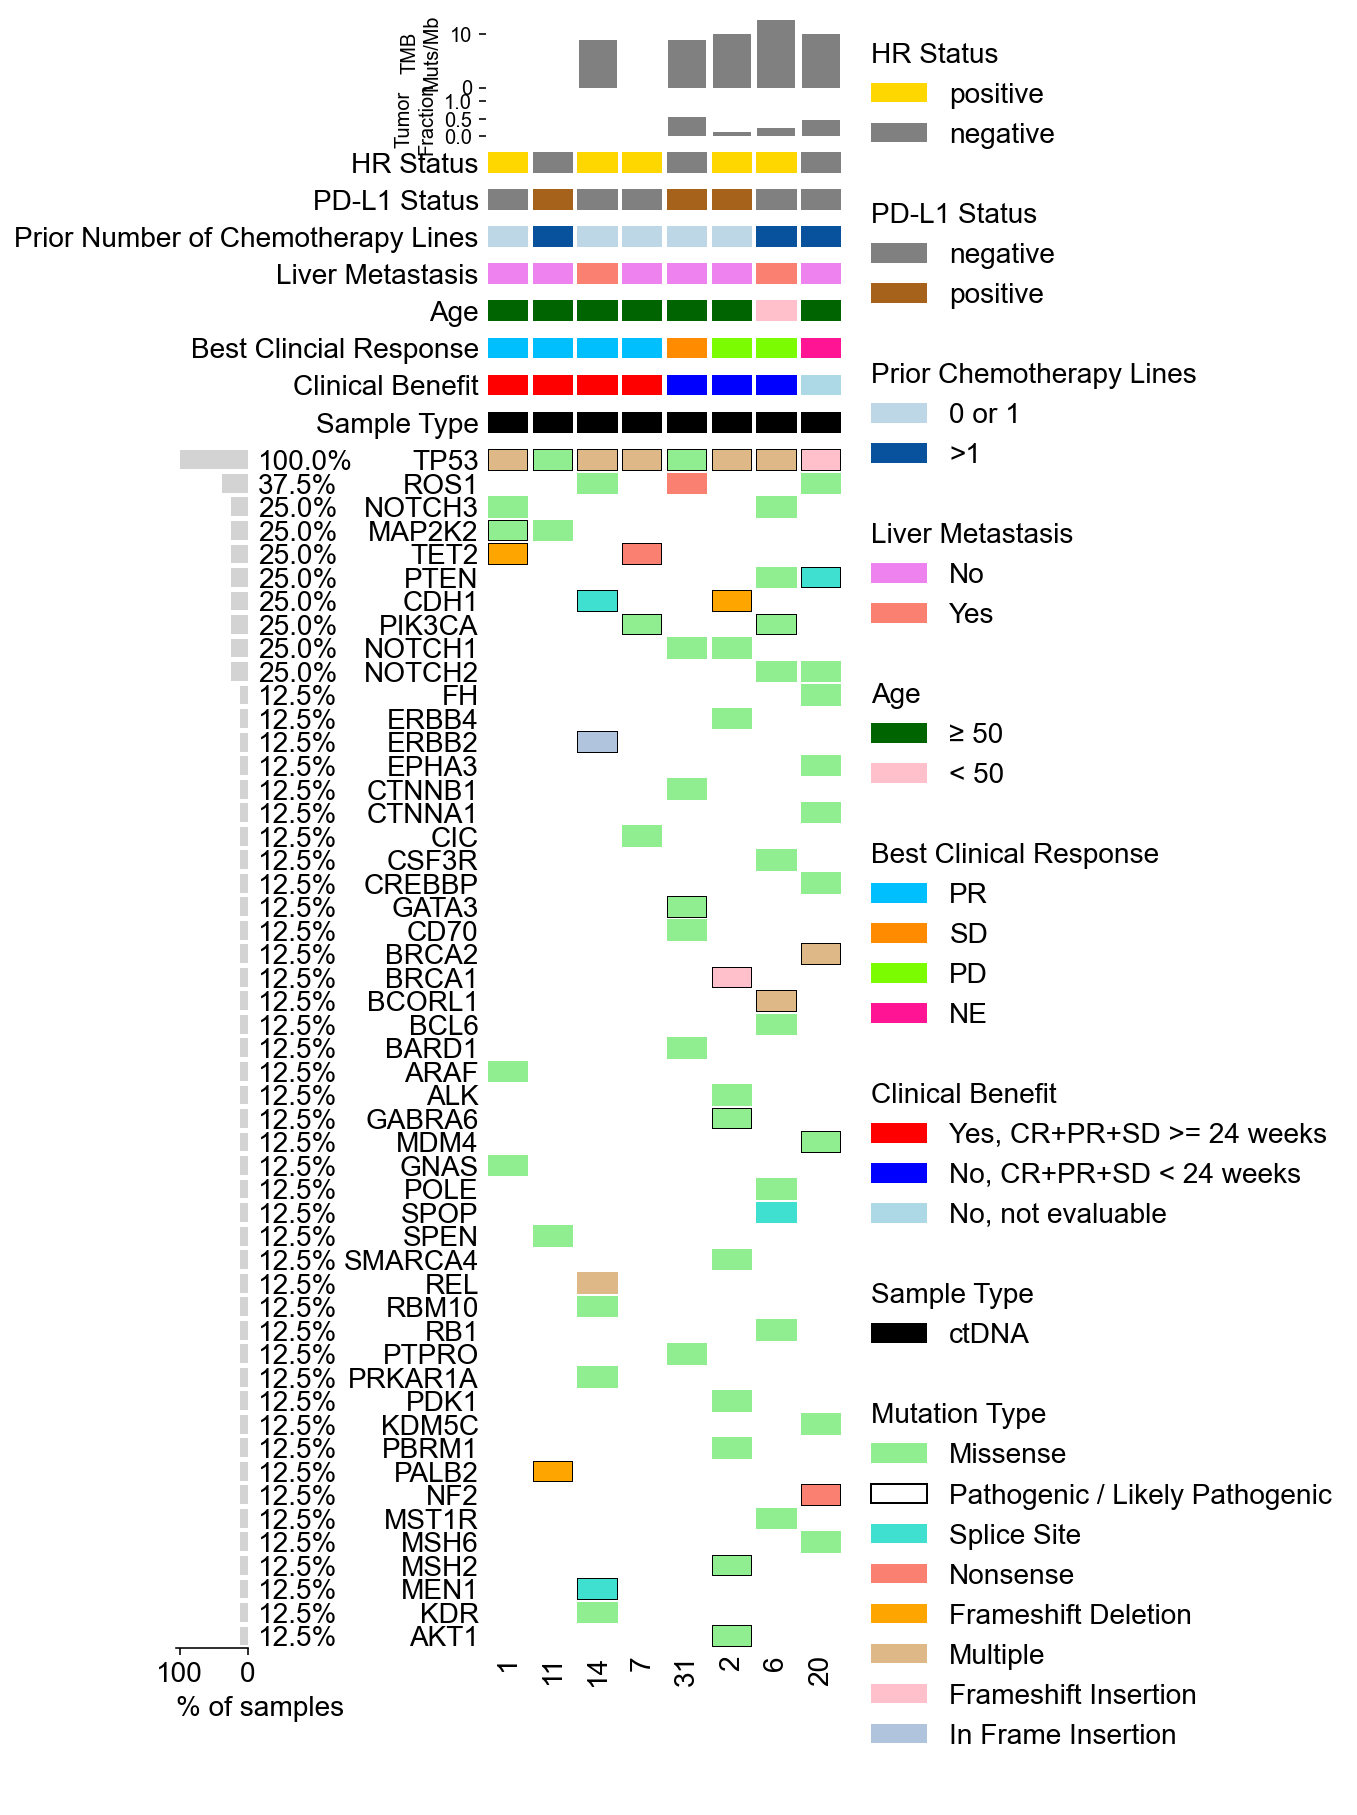

In [16]:
samples_id_timepoint=ctDNA_EOT
df_snv=snv_all_figures
df_clinical=clin_figures
df_tmb=TMB_ctDNA_tissue
df_tf=TF_all
df_dict=tissue_ctDNA_dict
label_pad=5
fig_width=6
wspace=1.1
perc_loc="left"

mut_df,dfcurr_sorting,dfcurr_sample_type,snv_curr_response,snv_curr_clin_response,age_curr,liver_curr,snv_curr_hr,snv_curr_tmb,dfcurr_top_25_gene, tf_curr,chemo_curr,pdl1_curr = prepare_files_comut(samples_id_timepoint,df_snv,df_clinical,df_tmb,df_dict,df_tf)


plot_name="Supplemental Figure 5 - ctDNA EOT"
mut_mapping={'Missense': 'lightgreen', 'Frameshift Deletion': 'orange','Frameshift Insertion':'pink',
                      'In Frame Deletion': 'plum','In Frame Insertion': 'lightsteelblue','Nonsense':'salmon',
                      'Splice Site':'turquoise','Multiple':'burlywood','Pathogenic / Likely Pathogenic': {'facecolor':'none', 'edgecolor':'black'}}

comut_plot(mut_df,dfcurr_sorting,dfcurr_sample_type,snv_curr_response,snv_curr_clin_response,age_curr,liver_curr,snv_curr_hr,snv_curr_tmb,dfcurr_top_25_gene,mut_mapping,plot_name,chemo_curr,pdl1_curr,tf_curr,fig_width=fig_width,label_pad=label_pad,wspace=wspace,perc_loc=perc_loc)

# TMB and  tumor fraction figures (Figures 3A-E)

# of pts: 12


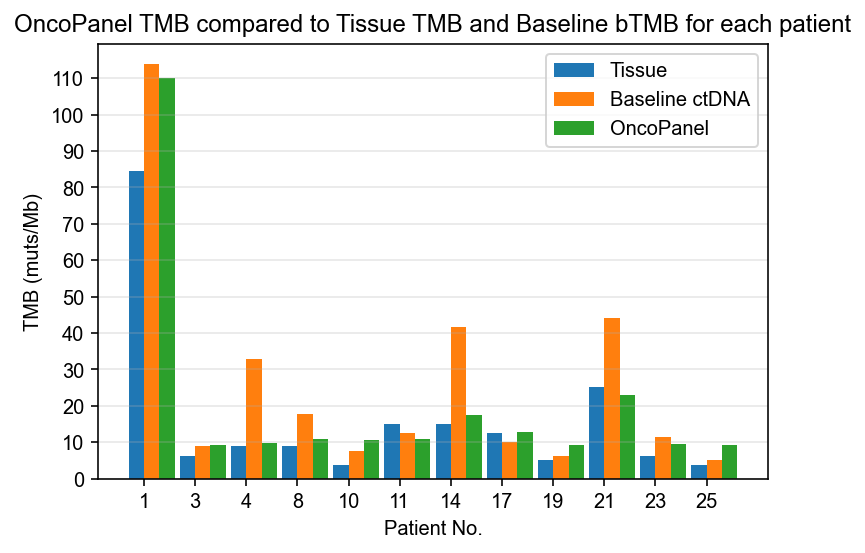

In [17]:
plot_name="Figure 3A - TMB comparisons"

bar_data=tmb_all_panels
bar_data=bar_data[(~bar_data["bTMB_F1LCDX"].isna())&(~bar_data["TMB_F1CDX"].isna())&(~bar_data["TMB_Oncopanel"].isna())]
bar_data = bar_data.sort_values(by='Subject ID')
print(f'# of pts: {bar_data.shape[0]}')
x = range(len(bar_data['Subject ID']))
width = 0.3

fig, ax = plt.subplots()
plt.grid(which='major',axis='y',alpha=0.3)
plt.yticks(range(0,130,10))
tmb_bars = ax.bar(x, bar_data['TMB_F1CDX'], width, label='Tissue')
btmb_bars = ax.bar([i + width for i in x], bar_data['bTMB_F1LCDX'], width, label='Baseline ctDNA')
oncopanel_bars = ax.bar([i + width*2 for i in x], bar_data['TMB_Oncopanel'], width, label='OncoPanel')

ax.set_xlabel('Patient No.')
ax.set_ylabel('TMB (muts/Mb)')
ax.set_title('OncoPanel TMB compared to Tissue TMB and Baseline bTMB for each patient')
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(bar_data['Subject ID'])
ax.legend()

plt.savefig(f'./NIMBUS Figures/{plot_name}.pdf', bbox_inches = 'tight', dpi = 300)
plt.savefig(f'./NIMBUS Figures/{plot_name}.png', bbox_inches = 'tight', dpi = 300)


In [18]:
def tmb_plots(plot_name,xvar,yvar,xtitle,ytitle,plt_title,bar_data_curr):
    plt.axline((0, 0), slope=1, linestyle='--', color='black', alpha=0.3)
    plt.scatter(bar_data_curr[xvar], bar_data_curr[yvar],c=['lightgrey'],alpha=0.6)
    corr, p = stat.pearsonr(bar_data_curr[xvar], bar_data_curr[yvar])
    pval='%.2E' % Decimal(p)
    rval="{:0.2f}".format(corr)
    Nplot=bar_data_curr[(~bar_data_curr[yvar].isna())&(~bar_data_curr[xvar].isna())].shape[0]

    # Make the x and y axis scales the same
    plt.axis('square')
    plt.xticks(range(0, 130, 20))
    plt.yticks(range(0, 130, 20))
    plt.xlim([0,120])
    plt.ylim([0,120])

    # Add labels and title
    plt.title(f'{plt_title}')
    plt.ylabel(f'{ytitle}')
    plt.xlabel(f'{xtitle}')    
    plt.text(5, 100, f'p = {pval}\nr = {rval}\nn = {Nplot}',fontsize=10)
    plt.savefig(f'./NIMBUS Figures/{plot_name}.pdf', bbox_inches = 'tight', dpi = 300)
    plt.savefig(f'./NIMBUS Figures/{plot_name}.png', bbox_inches = 'tight', dpi = 300)

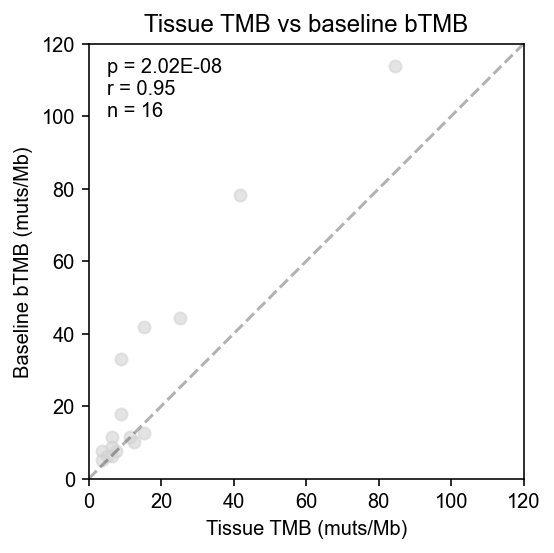

In [19]:
plot_name="Figure 3B - Tissue F1CDX TMB vs F1LCDX bTMB"
xvar='TMB_F1CDX'
yvar='bTMB_F1LCDX'
xtitle='Tissue TMB (muts/Mb)'
ytitle='Baseline bTMB (muts/Mb)'
plt_title="Tissue TMB vs baseline bTMB"

bar_data_all=tmb_all_panels
bar_data_curr=bar_data_all[(~bar_data_all[yvar].isna())&(~bar_data_all[xvar].isna())]
tmb_plots(plot_name=plot_name,xvar=xvar,yvar=yvar,xtitle=xtitle,ytitle=ytitle,plt_title=plt_title,bar_data_curr=bar_data_curr)

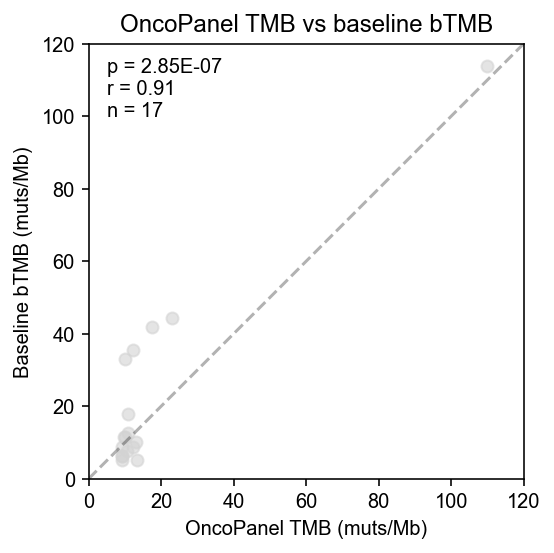

In [20]:
plot_name="Figure 3C - Oncopanel TMB vs F1LCDX bTMB"
xvar='TMB_Oncopanel'
yvar='bTMB_F1LCDX'
xtitle='OncoPanel TMB (muts/Mb)'
ytitle='Baseline bTMB (muts/Mb)'
plt_title="OncoPanel TMB vs baseline bTMB"

bar_data_curr=bar_data_all[(~bar_data_all[yvar].isna())&(~bar_data_all[xvar].isna())]
tmb_plots(plot_name=plot_name,xvar=xvar,yvar=yvar,xtitle=xtitle,ytitle=ytitle,plt_title=plt_title,bar_data_curr=bar_data_curr)

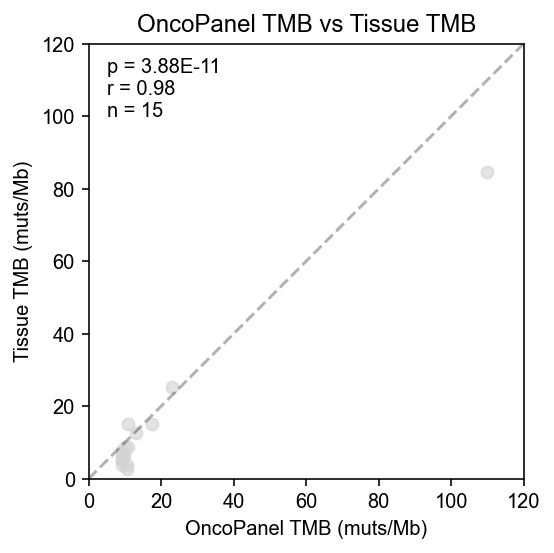

In [21]:
plot_name="Figure 3D - Oncopanel TMB vs Tissue F1CDX TMB"
xvar='TMB_Oncopanel'
yvar='TMB_F1CDX'
xtitle='OncoPanel TMB (muts/Mb)'
ytitle='Tissue TMB (muts/Mb)'
plt_title="OncoPanel TMB vs Tissue TMB"

bar_data_curr=bar_data_all[(~bar_data_all[yvar].isna())&(~bar_data_all[xvar].isna())]
tmb_plots(plot_name=plot_name,xvar=xvar,yvar=yvar,xtitle=xtitle,ytitle=ytitle,plt_title=plt_title,bar_data_curr=bar_data_curr)

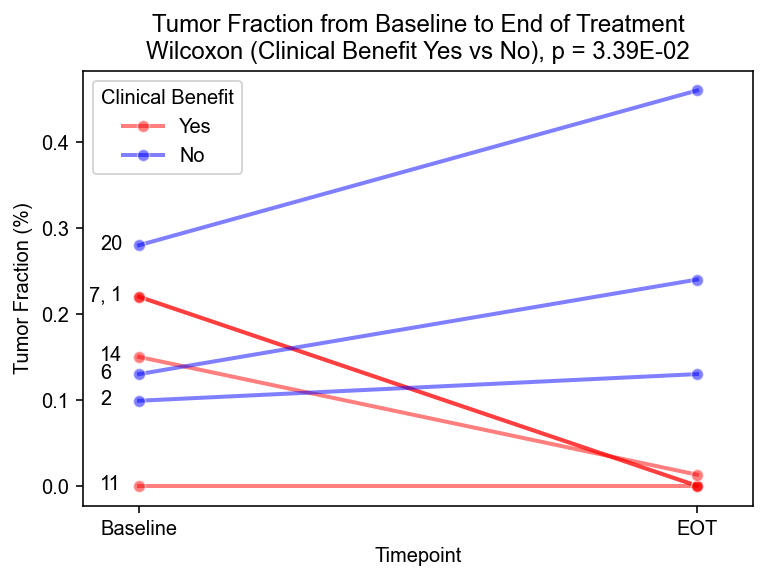

In [22]:
df_TF_wplot=df_TF_plot.pivot(index="SUBJECT_ID", columns="Time", values="TF_ESTIMATE").reset_index()
df_TF_wplot.columns.name = None
df_TF_wplot["SUBJECT_ID"]=df_TF_wplot["SUBJECT_ID"].astype(int)
df_TF_wplot=pd.merge(df_TF_wplot,clin_figures[["casenum","clinical benefit",'bestresp']].rename(columns={"casenum":"SUBJECT_ID"}),on="SUBJECT_ID",how="left")
df_TF_wplot['clinical benefit'] = df_TF_wplot['clinical benefit'].apply(lambda x: "Yes" if x=="CBR (CR+PR+SD >= 24 weeks)" else 'No')
df_TF_wplot["value"]=df_TF_wplot[1]-df_TF_wplot[0]
df_TF_wplot["SUBJECT_ID"]=df_TF_wplot["SUBJECT_ID"].astype(str)
x=df_TF_wplot[df_TF_wplot["clinical benefit"]=="Yes"]["value"]
y=df_TF_wplot[df_TF_wplot["clinical benefit"]=="No"]["value"]
st, p=stat.ranksums(x=x,y=y)
pval='%.2E' % Decimal(p)

df_TF_plot_sub=df_TF_plot[df_TF_plot["TIMEPOINT"]=="Baseline"].copy(deep=True)
df_TF_plot_sub["Time_plot"]=df_TF_plot_sub["Time"].astype(float)-0.07
df_TF_plot_sub["TF_ESTIMATE_plot"]=df_TF_plot_sub["TF_ESTIMATE"].astype(float)-0.005
df_TF_plot_sub["SUBJECT_ID_plot"]=df_TF_plot_sub["SUBJECT_ID"].astype(int).astype(str)
#They both happened to have the same start and end. Had verified this is not due to a mistake
df_TF_plot_sub.loc[df_TF_plot_sub["SUBJECT_ID_plot"]=="7","Time_plot"]=df_TF_plot_sub.loc[df_TF_plot_sub["SUBJECT_ID_plot"]=="7","Time_plot"]-0.02
df_TF_plot_sub.loc[df_TF_plot_sub["SUBJECT_ID_plot"]=="7","SUBJECT_ID_plot"]=df_TF_plot_sub.loc[df_TF_plot_sub["SUBJECT_ID_plot"]=="7","SUBJECT_ID_plot"]+","
df_TF_plot_sub.loc[df_TF_plot_sub["SUBJECT_ID_plot"]=="1","Time_plot"]=df_TF_plot_sub.loc[df_TF_plot_sub["SUBJECT_ID_plot"]=="1","Time_plot"]+0.02

plot_name="Figure 3E - TF dynamics"
ax = sns.lineplot(data=df_TF_plot,x="Time",y="TF_ESTIMATE",units="SUBJECT_ID",hue="clinical benefit",estimator=None,marker='o',linewidth=2,alpha=0.5,markersize=6,dashes=False,palette={"Yes":"red","No":"blue"})
plt.title(f'Tumor Fraction from Baseline to End of Treatment\nWilcoxon (Clinical Benefit Yes vs No), p = {pval}')
for ind in df_TF_plot_sub.index:
    ax.text(x=df_TF_plot_sub.loc[ind,"Time_plot"], y=df_TF_plot_sub.loc[ind,"TF_ESTIMATE_plot"],s=df_TF_plot_sub.loc[ind,"SUBJECT_ID_plot"])
plt.xlabel('Timepoint')
plt.xticks(ticks=[0,1],labels=["Baseline","EOT"])
plt.ylabel('Tumor Fraction (%)')
plt.legend(loc='upper left', title='Clinical Benefit')
plt.xlim([-0.1,1.1])

plt.savefig(f'./NIMBUS Figures/{plot_name}.pdf', bbox_inches = 'tight', dpi = 300)
plt.savefig(f'./NIMBUS Figures/{plot_name}.png', bbox_inches = 'tight', dpi = 300)